# About

This notebook is used to test stages of the track pattern recognition.

In [5]:
import os, sys
sys.path.append('../functions')

In [6]:
% matplotlib inline
import pandas
import numpy
import matplotlib.pyplot as plt

# Data reading

In [3]:
all_mctracks = pandas.read_csv('Data/MCTrack.csv', delimiter=',')
all_velo_points = pandas.read_csv('Data/vetoPoint.csv', delimiter=',')
all_hits = pandas.read_csv('Data/strawtubesPoint_decoded_hits.csv', delimiter=',')
all_hits['Index'] = all_hits.index
all_hits = all_hits[['Index', 'X', 'Y', 'Z', 'TrackID', 'Time', 'StatNb', 'ViewNb', 'PlaneNb', 'LayerNb', 'StrawNb', 'dist2Wire', 'event', 'k']]
all_hits.head()

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k
0,0,8.883409,-61.202305,-1974.859985,3,232.044861,5,0,0,0,319,0.274822,0,0
1,1,8.858191,-61.225544,-1973.742188,3,232.074081,5,0,0,1,320,0.582455,0,1
2,2,8.824563,-61.256523,-1972.251953,3,232.118286,5,0,1,0,319,0.111252,0,2
3,3,8.632817,-61.432972,-1963.756592,3,232.406479,5,1,0,1,320,0.164412,0,3
4,4,8.573978,-61.487133,-1961.149292,3,232.488541,5,1,1,1,320,0.226827,0,4


# Get reconstructible events

In [8]:
from ReconstructibleTracks import get_reconstractible_tracks

reconstructible_events = {}

for event_id in range(0, 100):
    
    tracks = get_reconstractible_tracks(event_id, all_hits, all_mctracks, all_velo_points)
    
    if tracks != []:
        reconstructible_events[event_id] = tracks

# Y-view pattern recognition. 1&2 stations.

### modify_for_yz_analysis

In [64]:
from Y_views import *
event_id = 2423
event = all_hits[all_hits['event'] == event_id]

event = modify_for_yz_analysis_1_2(event)
event

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
104409,104409,161.456512,-118.596184,2581.163574,3,384.522339,1,0,0,0,352,0.204267,2423,0,-118.8114,2581.15
104441,104441,98.668495,-48.177803,2581.145020,2,384.419891,1,0,0,0,312,0.222253,2423,32,-48.4114,2581.15
104410,104410,161.617706,-118.770599,2583.781250,3,384.620544,1,0,1,0,352,0.470440,2423,1,-119.2514,2583.75
104411,104411,161.681473,-118.839676,2584.818115,3,384.656860,1,0,1,1,352,0.480737,2423,2,-118.3714,2584.85
104442,104442,98.615936,-48.093636,2584.853027,2,384.542450,1,0,1,1,312,0.133668,2423,33,-47.9714,2584.85
104416,104416,163.304108,-120.597641,2611.147461,3,385.525299,1,3,0,0,353,0.037728,2423,7,-120.5714,2611.15
104447,104447,98.226349,-47.468971,2612.248779,2,385.456146,1,3,0,1,312,0.051043,2423,38,-47.5314,2612.25
104417,104417,163.465591,-120.773026,2613.765137,3,385.614838,1,3,1,0,353,0.227485,2423,8,-121.0114,2613.75
104448,104448,98.204857,-47.434364,2613.758057,2,385.511505,1,3,1,0,311,0.354458,2423,39,-47.0914,2613.75
104449,104449,95.822952,-43.449871,2781.158203,2,391.097076,2,0,0,0,309,0.329973,2423,40,-43.1314,2781.15


In [66]:
track = event[event.TrackID == 3]
track

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
104409,104409,161.456512,-118.596184,2581.163574,3,384.522339,1,0,0,0,352,0.204267,2423,0,-118.8114,2581.15
104410,104410,161.617706,-118.770599,2583.781250,3,384.620544,1,0,1,0,352,0.470440,2423,1,-119.2514,2583.75
104411,104411,161.681473,-118.839676,2584.818115,3,384.656860,1,0,1,1,352,0.480737,2423,2,-118.3714,2584.85
104416,104416,163.304108,-120.597641,2611.147461,3,385.525299,1,3,0,0,353,0.037728,2423,7,-120.5714,2611.15
104417,104417,163.465591,-120.773026,2613.765137,3,385.614838,1,3,1,0,353,0.227485,2423,8,-121.0114,2613.75
104418,104418,173.861084,-132.372391,2782.223389,3,391.262787,2,0,0,1,360,0.373332,2423,9,-132.0114,2782.25
104419,104419,174.022568,-132.559601,2784.841553,3,391.345215,2,0,1,1,360,0.119914,2423,10,-132.4514,2784.85
104424,104424,175.647446,-134.457779,2811.163330,3,392.227997,2,3,0,0,361,0.182700,2423,15,-134.6514,2811.15
104425,104425,175.809082,-134.648392,2813.781494,3,392.323334,2,3,1,0,361,0.432746,2423,16,-135.0914,2813.75


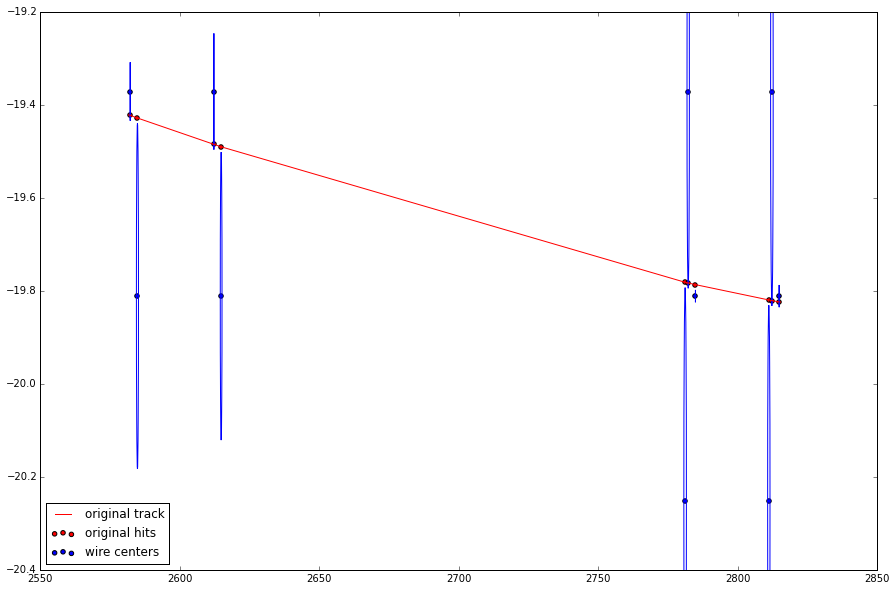

In [32]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = track.Wz.values
Wy = track.Wy.values
Z = track.Z.values
Y = track.Y.values
R = track.dist2Wire.values
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.plot(Z, Y, c='r', label='original track')
plt.scatter(Z, Y, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)


plt.legend(loc='best')
plt.show()

### conventor_yz

In [33]:
hits = conventor_yz(event, 0)
hits

{2582.25: [<Y_views.ParametresYZ instance at 0x10746fcb0>,
  <Y_views.ParametresYZ instance at 0x1074224d0>],
 2584.8499999999999: [<Y_views.ParametresYZ instance at 0x1074f8cf8>,
  <Y_views.ParametresYZ instance at 0x1074f8a28>],
 2612.25: [<Y_views.ParametresYZ instance at 0x1074f8290>,
  <Y_views.ParametresYZ instance at 0x10689dcb0>],
 2614.8499999999999: [<Y_views.ParametresYZ instance at 0x10689db90>,
  <Y_views.ParametresYZ instance at 0x10686cfc8>],
 2781.1500000000001: [<Y_views.ParametresYZ instance at 0x10741c710>],
 2782.25: [<Y_views.ParametresYZ instance at 0x106810998>,
  <Y_views.ParametresYZ instance at 0x1068108c0>],
 2784.8499999999999: [<Y_views.ParametresYZ instance at 0x10753fb00>,
  <Y_views.ParametresYZ instance at 0x1069265a8>],
 2811.1500000000001: [<Y_views.ParametresYZ instance at 0x106889050>],
 2812.25: [<Y_views.ParametresYZ instance at 0x106889290>,
  <Y_views.ParametresYZ instance at 0x107542758>],
 2814.8499999999999: [<Y_views.ParametresYZ instance at

### points_crossing_line_yz

In [34]:
z1 = track.Wz.min()
z2 = track.Wz.max()
y1 = track.Wy.min()
y2 = track.Wy.max()

plane_k = (y2 - y1) / (z2 - z1)
plane_b = y1 - plane_k * z1
plane_width = 0.85
n_min = 7



_, crossing_points, lin_regr = points_crossing_line_yz(plane_k, plane_b, plane_width, hits, n_min, 0)

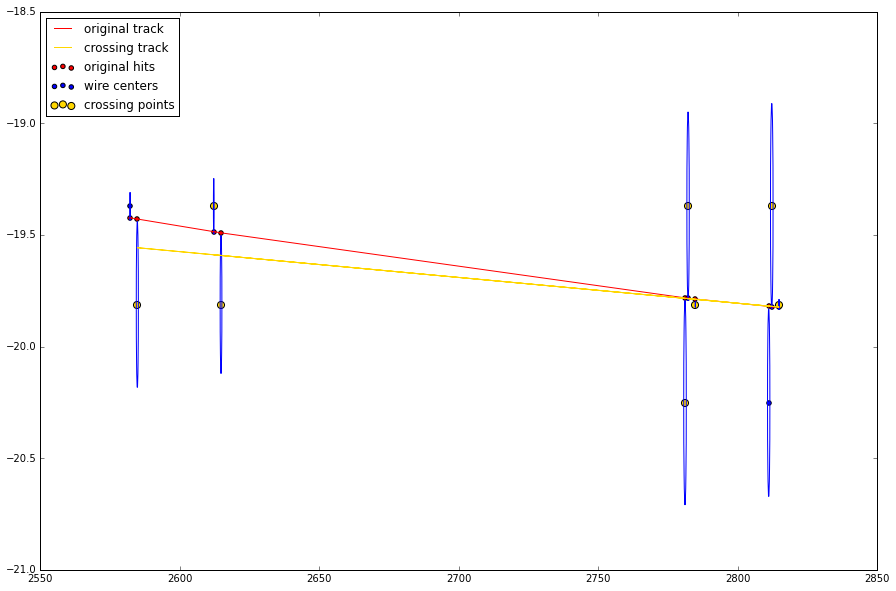

In [35]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = track.Wz.values
Wy = track.Wy.values
Z = track.Z.values
Y = track.Y.values
R = track.dist2Wire.values
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.plot(Z, Y, c='r', label='original track')
plt.scatter(Z, Y, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)
    
# crossing point
Z_crossing = np.array([event.loc[i].Wz for i in crossing_points])
Y_crossing = np.array([event.loc[i].Wy for i in crossing_points])
Y_line_crossing = Z_crossing * lin_regr[0] + lin_regr[1]

plt.scatter(Z_crossing, Y_crossing, c='gold', label='crossing points', s=50)
plt.plot(Z_crossing, Y_line_crossing , c='gold', label='crossing track')



plt.legend(loc='best')
plt.show()

### loop_yz

In [36]:
tracks, linking_table = loop_yz(event, 7, 0.87, 0, 0)

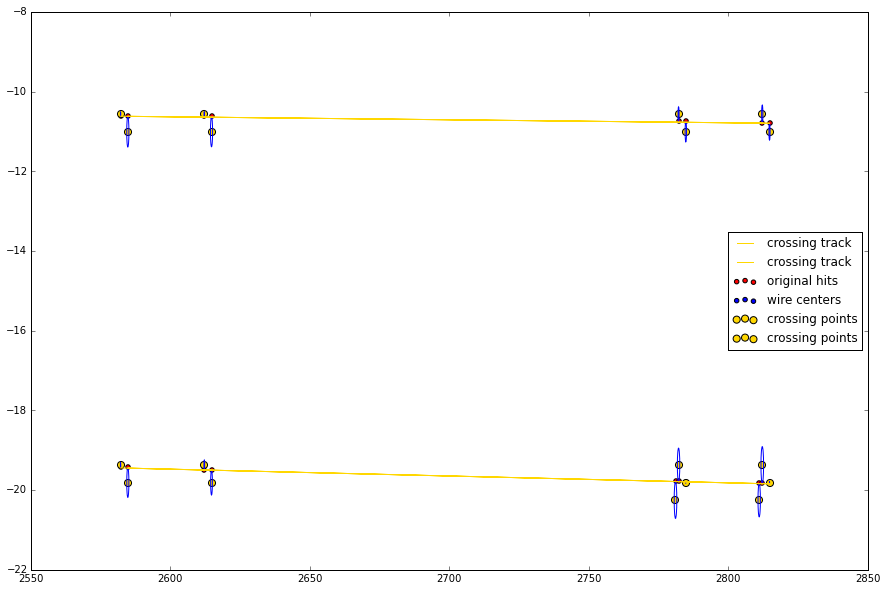

In [37]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = event.Wz.values
Wy = event.Wy.values
Z = event.Z.values
Y = event.Y.values
R = event.dist2Wire.values
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.scatter(Z, Y, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)
    
# loop_yz
for key in linking_table:
    
    crossing_points = linking_table[key]
    lin_regr = tracks[key
                     ]
    Z_crossing = np.array([event.loc[i].Wz for i in crossing_points])
    Y_crossing = np.array([event.loc[i].Wy for i in crossing_points])
    Y_line_crossing = Z_crossing * lin_regr[0] + lin_regr[1]

    plt.scatter(Z_crossing, Y_crossing, c='gold', label='crossing points', s=50)
    plt.plot(Z_crossing, Y_line_crossing , c='gold', label='crossing track')



plt.legend(loc='best')
plt.show()

# Stereo-view pattern recognition. 1&2 stations.

### modify_for_xz_analysis_1_2

In [38]:
from UV_views import *
#event_id = 2
event2 = all_hits[all_hits['event'] == event_id]

event2 = modify_for_xz_analysis_1_2(event2)
event2

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,...,event,k,Wu,Wv1,Wv2,Wx1,Wx2,Wy1,Wy2,Wz
68744,68744,-66.191910,-19.441660,2591.149658,2,384.243988,1,1,0,0,...,1668,34,-13.2114,-250,250,-247.897225,250.200124,-34.950062,8.627809,2591.2793
68712,68712,17.221878,-10.620386,2592.250488,3,384.277679,1,1,0,1,...,1668,2,-12.3314,-250,250,-247.973922,250.123427,-34.073411,9.504460,2592.3793
68745,68745,-66.208405,-19.443928,2592.250244,2,384.287354,1,1,0,1,...,1668,35,-14.0914,-250,250,-247.820528,250.276821,-35.826714,7.751158,2592.3793
68713,68713,17.246414,-10.620683,2593.749756,3,384.327087,1,1,1,0,...,1668,3,-11.8914,-250,250,-248.012271,250.085078,-33.635085,9.942786,2593.8793
68746,68746,-66.230904,-19.447010,2593.750000,2,384.323883,1,1,1,0,...,1668,36,-13.6514,-250,250,-247.858877,250.238472,-35.388388,8.189483,2593.8793
68747,68747,-66.341957,-19.462332,2601.151123,2,384.575684,1,2,0,0,...,1668,37,-25.5314,-250,250,-251.273883,246.823466,-3.645310,-47.223181,2601.2793
68714,68714,17.385580,-10.622489,2602.250244,3,384.611847,1,2,0,1,...,1668,4,-8.8114,-250,250,-249.816639,248.280710,13.011066,-30.566806,2602.3793
68715,68715,17.428143,-10.623096,2604.849854,3,384.697021,1,2,1,1,...,1668,5,-9.2514,-250,250,-249.854987,248.242362,12.572740,-31.005131,2604.9793
68748,68748,-66.397446,-19.469942,2604.849609,2,384.694489,1,2,1,1,...,1668,38,-25.0914,-250,250,-251.235534,246.861815,-3.206984,-46.784855,2604.9793
68720,68720,20.493572,-10.758950,2792.249512,3,390.949005,2,1,0,1,...,1668,10,-12.3314,-250,250,-247.973922,250.123427,-34.073411,9.504460,2792.3793


In [39]:
track2 = event2[event2.TrackID == 3]
track2

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,...,event,k,Wu,Wv1,Wv2,Wx1,Wx2,Wy1,Wy2,Wz
68712,68712,17.221878,-10.620386,2592.250488,3,384.277679,1,1,0,1,...,1668,2,-12.3314,-250,250,-247.973922,250.123427,-34.073411,9.504460,2592.3793
68713,68713,17.246414,-10.620683,2593.749756,3,384.327087,1,1,1,0,...,1668,3,-11.8914,-250,250,-248.012271,250.085078,-33.635085,9.942786,2593.8793
68714,68714,17.385580,-10.622489,2602.250244,3,384.611847,1,2,0,1,...,1668,4,-8.8114,-250,250,-249.816639,248.280710,13.011066,-30.566806,2602.3793
68715,68715,17.428143,-10.623096,2604.849854,3,384.697021,1,2,1,1,...,1668,5,-9.2514,-250,250,-249.854987,248.242362,12.572740,-31.005131,2604.9793
68720,68720,20.493572,-10.758950,2792.249512,3,390.949005,2,1,0,1,...,1668,10,-12.3314,-250,250,-247.973922,250.123427,-34.073411,9.504460,2792.3793
68721,68721,20.536091,-10.762739,2794.850830,3,391.036835,2,1,1,1,...,1668,11,-12.7714,-250,250,-247.935574,250.161775,-34.511737,9.066135,2794.9793
68722,68722,20.657095,-10.773609,2802.250000,3,391.282043,2,2,0,1,...,1668,12,-8.8114,-250,250,-249.816639,248.280710,13.011066,-30.566806,2802.3793
68723,68723,20.699615,-10.777634,2804.850098,3,391.371796,2,2,1,1,...,1668,13,-9.2514,-250,250,-249.854987,248.242362,12.572740,-31.005131,2804.9793


### get_xz

In [40]:
[plane_k, plane_b] = np.polyfit(track2.Z.values, track2.Y.values, 1)

int_hits = get_xz(plane_k, plane_b, track2)
int_hits

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,...,Wu,Wv1,Wv2,Wx1,Wx2,Wy1,Wy2,Wz,Wy,Wx
68712,68712,17.221878,-10.620386,2592.250488,3,384.277679,1,1,0,1,...,-12.3314,-250,250,-247.973922,250.123427,-34.073411,9.504460,2592.3793,-10.617323,20.130395
68713,68713,17.246414,-10.620683,2593.749756,3,384.327087,1,1,1,0,...,-11.8914,-250,250,-248.012271,250.085078,-33.635085,9.942786,2593.8793,-10.618421,15.069409
68714,68714,17.385580,-10.622489,2602.250244,3,384.611847,1,2,0,1,...,-8.8114,-250,250,-249.816639,248.280710,13.011066,-30.566806,2602.3793,-10.624643,20.340754
68715,68715,17.428143,-10.623096,2604.849854,3,384.697021,1,2,1,1,...,-9.2514,-250,250,-249.854987,248.242362,12.572740,-31.005131,2604.9793,-10.626547,15.314076
68720,68720,20.493572,-10.758950,2792.249512,3,390.949005,2,1,0,1,...,-12.3314,-250,250,-247.973922,250.123427,-34.073411,9.504460,2792.3793,-10.763740,18.456834
68721,68721,20.536091,-10.762739,2794.850830,3,391.036835,2,1,1,1,...,-12.7714,-250,250,-247.935574,250.161775,-34.511737,9.066135,2794.9793,-10.765644,23.483511
68722,68722,20.657095,-10.773609,2802.250000,3,391.282043,2,2,0,1,...,-8.8114,-250,250,-249.816639,248.280710,13.011066,-30.566806,2802.3793,-10.771061,22.014315
68723,68723,20.699615,-10.777634,2804.850098,3,391.371796,2,2,1,1,...,-9.2514,-250,250,-249.854987,248.242362,12.572740,-31.005131,2804.9793,-10.772965,16.987637


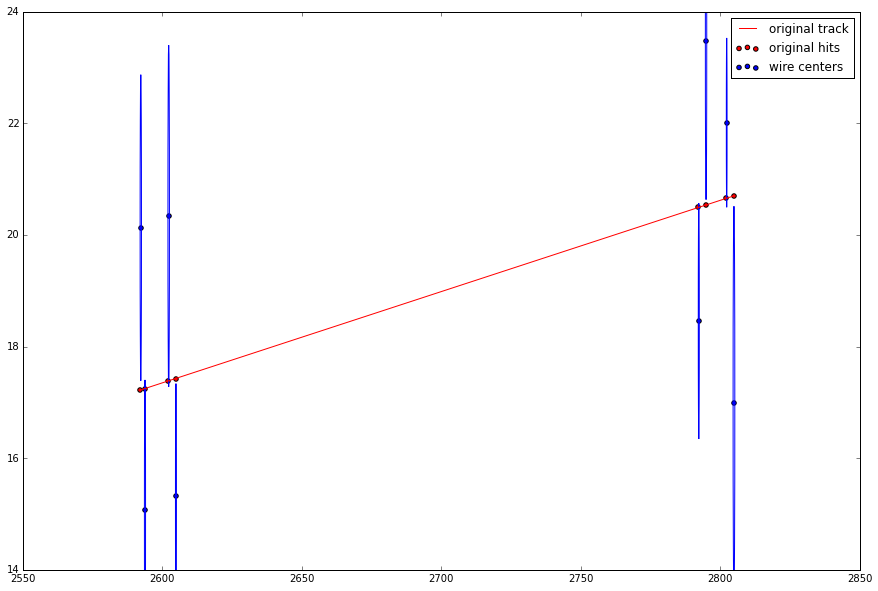

In [41]:
import matplotlib as mpl
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = int_hits.Wz.values
Wx = int_hits.Wx.values
Z = int_hits.Z.values
X = int_hits.X.values
R = (int_hits.dist2Wire.values) / np.sin(5. * np.pi / 180.)
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.scatter(Z, X, c='r', label='original hits')
plt.plot(Z, X, c='r', label='original track')

# The wire centers and dist2wire
plt.scatter(Wz, Wx, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    ellipse = mpl.patches.Ellipse(xy=(Wz[index], Wx[index]), width=2*R[index]*np.sin(5.*np.pi/180.),
                                  height=2*R[index], color='b', fill=False)
    ax.add_patch(ellipse)


plt.legend(loc='best')
plt.show()

### conventor_xz

In [42]:
hits2 = conventor_xz(track2, 0)
hits2

{2592.3793000000001: {68712: <UV_views.parametresXZ instance at 0x103de8050>},
 2593.8793000000001: {68713: <UV_views.parametresXZ instance at 0x1067e1680>},
 2602.3793000000001: {68714: <UV_views.parametresXZ instance at 0x1067e19e0>},
 2604.9793: {68715: <UV_views.parametresXZ instance at 0x1067e1ef0>},
 2792.3793000000001: {68720: <UV_views.parametresXZ instance at 0x1074d3c20>},
 2794.9793: {68721: <UV_views.parametresXZ instance at 0x1074d65f0>},
 2802.3793000000001: {68722: <UV_views.parametresXZ instance at 0x10a0280e0>},
 2804.9793: {68723: <UV_views.parametresXZ instance at 0x10a028f38>}}

### points_crossing_line_xz

In [43]:
intersecting_hits = {}
tmp = {}

k = plane_k
b = plane_b

hits_xz = get_xz(k, b, track2)

# TODO: the loop optimization
for z in hits2:

    y = k * z + b

    for hit_index in hits2[z]:

        x = hits_xz.loc[[hit_index]].Wx.values[0]

        if ((x > -250) & (x < 250) & (not hits2[z][hit_index].used)):

            hits2[z][hit_index].x = x
            tmp[hit_index] = x
            intersecting_hits.setdefault(z, []).append(hit_index)

In [44]:
[k, b] = np.polyfit(track2.Z.values, track2.X.values, 1)

_, crossing_points2, lin_regr2 = points_crossing_line_xz(k, b, 15, hits2, intersecting_hits, 6)

crossing_points2, lin_regr2

([68722, 68712, 68715, 68714, 68713, 68720, 68721, 68723],
 array([  1.22762041e-02,  -1.41532335e+01]))

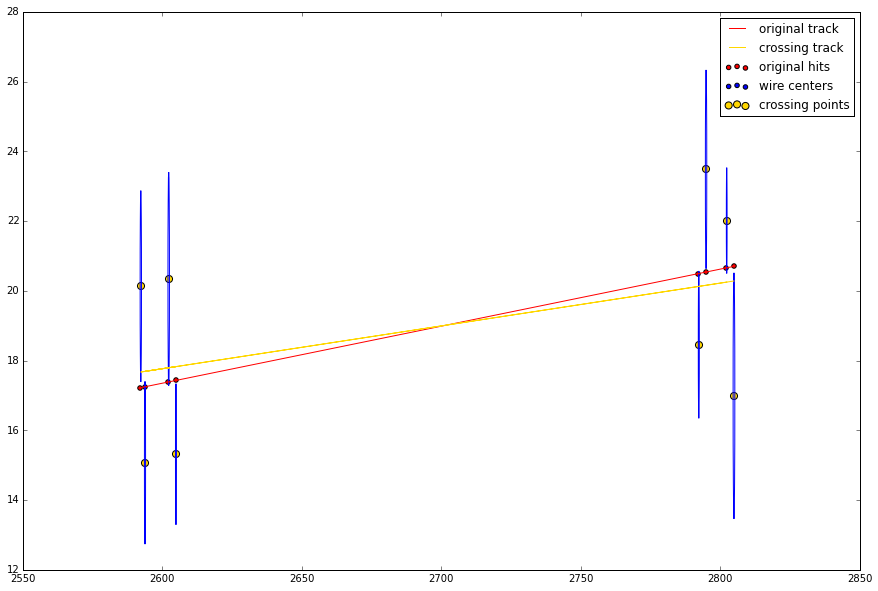

In [45]:
import matplotlib as mpl
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = int_hits.Wz.values
Wx = int_hits.Wx.values
Z = int_hits.Z.values
X = int_hits.X.values
R = (int_hits.dist2Wire.values) / np.sin(5. * np.pi / 180.)
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.scatter(Z, X, c='r', label='original hits')
plt.plot(Z, X, c='r', label='original track')

# The wire centers and dist2wire
plt.scatter(Wz, Wx, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    ellipse = mpl.patches.Ellipse(xy=(Wz[index], Wx[index]), width=2*R[index]*np.sin(5.*np.pi/180.),
                                  height=2*R[index], color='b', fill=False)
    ax.add_patch(ellipse)
    
# crossing point
Z_crossing = np.array([int_hits.loc[i].Wz for i in crossing_points2])
X_crossing = np.array([int_hits.loc[i].Wx for i in crossing_points2])
X_line_crossing = Z_crossing * lin_regr2[0] + lin_regr2[1]

plt.scatter(Z_crossing, X_crossing, c='gold', label='crossing points', s=50)
plt.plot(Z_crossing, X_line_crossing , c='gold', label='crossing track')


plt.legend(loc='best')
plt.show()

### loop_xz

In [58]:
new_tracks, new_linking_table, x_coordinates = loop_xz(event2, tracks, linking_table, 6, 15, 0)

In [59]:
new_tracks

{10001: array([ -1.72817858e-02,  -2.59395886e+01])}

In [60]:
new_linking_table

{10001: [68757, 68744, 68748, 68756, 68747, 68720, 68755, 68712, 68746, 68721]}

In [61]:
x_coordinates

{68712: -80.965564008598705,
 68720: -84.879097459940539,
 68721: -79.881539566713201,
 68744: -70.847171918426938,
 68746: -65.849614025200253,
 68747: -70.313298595659234,
 68748: -65.192464398714037,
 68755: -69.763147476542088,
 68756: -66.399765144317399,
 68757: -71.397323037543998}

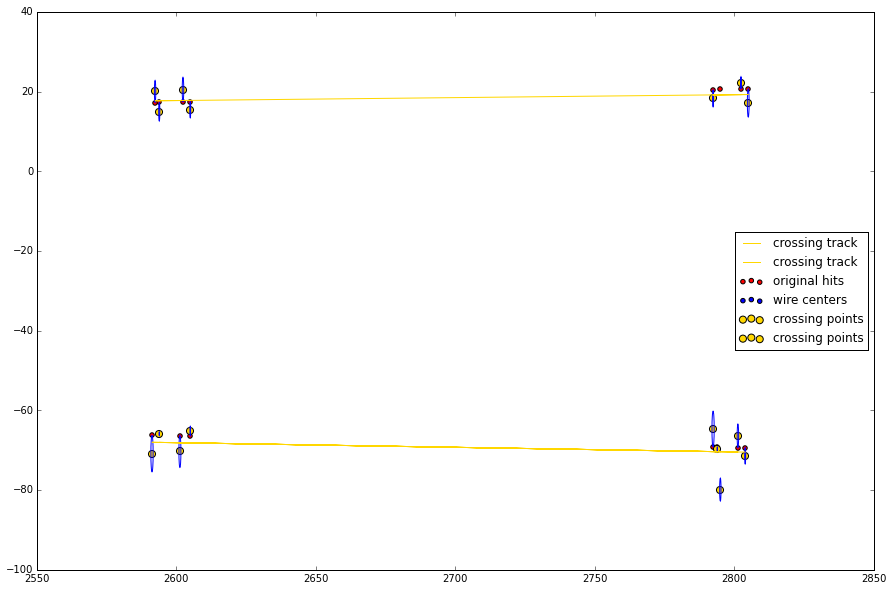

In [56]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = [event2.loc[[i]].Wz.values[0] for i in new_linking_table.values()[0]] + \
     [event2.loc[[i]].Wz.values[0] for i in new_linking_table.values()[1]]
Wx = [x_coordinates[i] for i in new_linking_table.values()[0]] + \
     [x_coordinates[i] for i in new_linking_table.values()[1]] 
Z = [event2.loc[[i]].Z.values[0] for i in new_linking_table.values()[0]] + \
    [event2.loc[[i]].Z.values[0] for i in new_linking_table.values()[1]]
X = [event2.loc[[i]].X.values[0] for i in new_linking_table.values()[0]] + \
    [event2.loc[[i]].X.values[0] for i in new_linking_table.values()[1]]

R = np.array([event2.loc[[i]].dist2Wire.values[0] for i in new_linking_table.values()[0]] + \
     [event2.loc[[i]].dist2Wire.values[0] for i in new_linking_table.values()[1]]) / np.sin(5. * np.pi / 180.)
StrwR = 0.5 * numpy.ones(shape=(len(Z),))

# originl track and hits
plt.scatter(Z, X, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wx, c='b', label='wire centers')
for index in range(0, len(Wz)):
    ellipse = mpl.patches.Ellipse(xy=(Wz[index], Wx[index]), width=2*R[index]*np.sin(5.*np.pi/180.),
                                  height=2*R[index], color='b', fill=False)
    ax.add_patch(ellipse)
    
# loop_yz
for key in new_linking_table:
    
    crossing_points = new_linking_table[key]
    lin_regr = new_tracks[key]
    Z_crossing = np.array([event2.loc[i].Wz for i in crossing_points])
    X_crossing = np.array([x_coordinates[i] for i in crossing_points])
    X_line_crossing = Z_crossing * lin_regr[0] + lin_regr[1]

    plt.scatter(Z_crossing, X_crossing, c='gold', label='crossing points', s=50)
    plt.plot(Z_crossing, X_line_crossing , c='gold', label='crossing track')



plt.legend(loc='best')
plt.show()

# Y-view pattern recognition. 3&4 stations.

### modify_for_yz_analysis

In [27]:
from Y_views import *
event_id = 2
event = all_hits[all_hits['event'] == event_id]

event = modify_for_yz_analysis_3_4(event)
event

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
58,58,57.558144,10.965934,3321.156982,3,408.579224,3,0,0,0,278,0.474116,2,17,11.4286,3321.15
59,59,57.548088,10.981816,3322.243896,3,408.611115,3,0,0,1,279,0.421861,2,18,10.5486,3322.25
98,98,81.869873,-1.444798,3322.251465,2,408.606445,3,0,0,1,286,0.315205,2,57,-1.7714,3322.25
60,60,57.534149,11.003839,3323.750000,3,408.653229,3,0,1,0,278,0.003839,2,19,10.9886,3323.75
99,99,81.887085,-1.452010,3323.749268,2,408.653168,3,0,1,0,285,0.132011,2,58,-1.3314,3323.75
66,66,57.279995,11.408733,3351.150391,3,409.567413,3,3,0,0,278,0.031270,2,25,11.4286,3351.15
104,104,82.214432,-1.590673,3352.250732,2,409.604370,3,3,0,1,286,0.169329,2,63,-1.7714,3352.25
67,67,57.255859,11.447518,3353.743408,3,409.663696,3,3,1,0,278,0.447569,2,26,10.9886,3353.75
105,105,82.231628,-1.598032,3353.748535,2,409.656219,3,3,1,0,285,0.278036,2,64,-1.3314,3353.75
68,68,57.245502,11.464171,3354.856201,3,409.698792,3,3,1,1,278,0.415875,2,27,11.8686,3354.85


In [28]:
track = event[event.TrackID == 2]
track

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
98,98,81.869873,-1.444798,3322.251465,2,408.606445,3,0,0,1,286,0.315205,2,57,-1.7714,3322.25
99,99,81.887085,-1.452010,3323.749268,2,408.653168,3,0,1,0,285,0.132011,2,58,-1.3314,3323.75
104,104,82.214432,-1.590673,3352.250732,2,409.604370,3,3,0,1,286,0.169329,2,63,-1.7714,3352.25
105,105,82.231628,-1.598032,3353.748535,2,409.656219,3,3,1,0,285,0.278036,2,64,-1.3314,3353.75
106,106,84.152946,-2.453004,3521.150879,2,415.238953,4,0,0,0,286,0.186998,2,65,-2.6514,3521.15
107,107,84.195389,-2.472446,3524.848633,2,415.363831,4,0,1,1,286,0.272450,2,66,-2.2114,3524.85
113,113,84.497162,-2.611311,3551.150146,2,416.238464,4,3,0,0,286,0.028689,2,72,-2.6514,3551.15
114,114,84.527008,-2.625106,3553.752441,2,416.335693,4,3,1,0,286,0.454900,2,73,-3.0914,3553.75
115,115,84.539574,-2.630958,3554.847656,2,416.370453,4,3,1,1,286,0.430964,2,74,-2.2114,3554.85


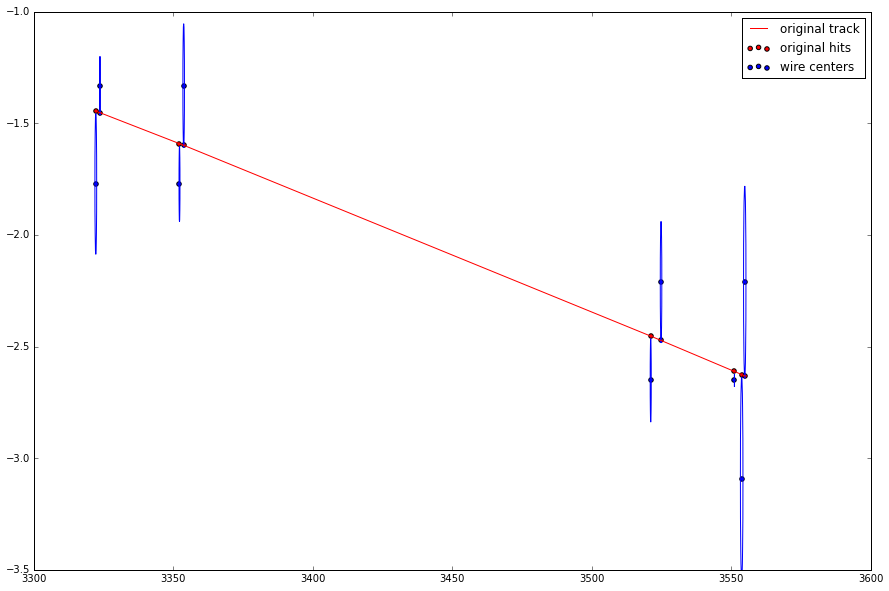

In [29]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = track.Wz.values
Wy = track.Wy.values
Z = track.Z.values
Y = track.Y.values
R = track.dist2Wire.values
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.plot(Z, Y, c='r', label='original track')
plt.scatter(Z, Y, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)


plt.legend(loc='best')
plt.show()

### conventor_yz

In [30]:
hits = conventor_yz(event, 1)
hits

{3321.1500000000001: [<Y_views.ParametresYZ instance at 0x11155ea28>],
 3322.25: [<Y_views.ParametresYZ instance at 0x11162fc20>,
  <Y_views.ParametresYZ instance at 0x11162f488>],
 3323.75: [<Y_views.ParametresYZ instance at 0x11162fe60>,
  <Y_views.ParametresYZ instance at 0x11162fb00>],
 3351.1500000000001: [<Y_views.ParametresYZ instance at 0x11162f9e0>],
 3352.25: [<Y_views.ParametresYZ instance at 0x11162f4d0>],
 3353.75: [<Y_views.ParametresYZ instance at 0x11162ff38>,
  <Y_views.ParametresYZ instance at 0x11162f5a8>],
 3354.8499999999999: [<Y_views.ParametresYZ instance at 0x11162fb48>],
 3521.1500000000001: [<Y_views.ParametresYZ instance at 0x11162fcf8>],
 3522.25: [<Y_views.ParametresYZ instance at 0x11162f098>],
 3523.75: [<Y_views.ParametresYZ instance at 0x11162f680>],
 3524.8499999999999: [<Y_views.ParametresYZ instance at 0x11162fa28>,
  <Y_views.ParametresYZ instance at 0x11162fc68>],
 3551.1500000000001: [<Y_views.ParametresYZ instance at 0x11162f998>,
  <Y_views.Para

### points_crossing_line_yz

In [31]:
z1 = track.Wz.min()
z2 = track.Wz.max()
y1 = track.Wy.min()
y2 = track.Wy.max()

plane_k = (y2 - y1) / (z2 - z1)
plane_b = y1 - plane_k * z1
plane_width = 0.85
n_min = 7



_, crossing_points, lin_regr = points_crossing_line_yz(plane_k, plane_b, plane_width, hits, n_min)

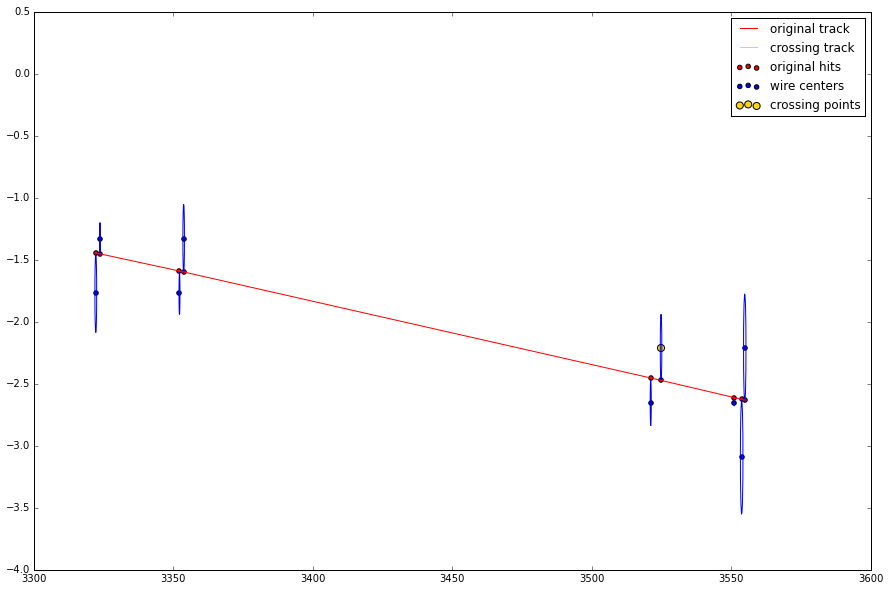

In [32]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = track.Wz.values
Wy = track.Wy.values
Z = track.Z.values
Y = track.Y.values
R = track.dist2Wire.values
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.plot(Z, Y, c='r', label='original track')
plt.scatter(Z, Y, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)
    
# crossing point
Z_crossing = np.array([event.loc[i].Wz for i in crossing_points])
Y_crossing = np.array([event.loc[i].Wy for i in crossing_points])
Y_line_crossing = Z_crossing * lin_regr[0] + lin_regr[1]

plt.scatter(Z_crossing, Y_crossing, c='gold', label='crossing points', s=50)
plt.plot(Z_crossing, Y_line_crossing , c='gold', label='crossing track')



plt.legend(loc='best')
plt.show()

### loop_yz

In [33]:
tracks, linking_table = loop_yz(event, 7, 0.87, 1)

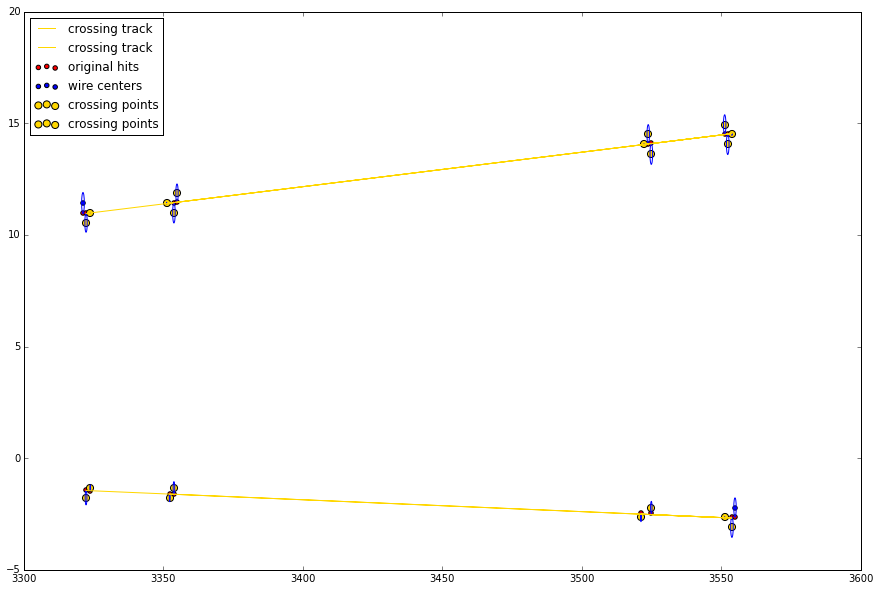

In [34]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = event.Wz.values
Wy = event.Wy.values
Z = event.Z.values
Y = event.Y.values
R = event.dist2Wire.values
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.scatter(Z, Y, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)
    
# loop_yz
for key in linking_table:
    
    crossing_points = linking_table[key]
    lin_regr = tracks[key
                     ]
    Z_crossing = np.array([event.loc[i].Wz for i in crossing_points])
    Y_crossing = np.array([event.loc[i].Wy for i in crossing_points])
    Y_line_crossing = Z_crossing * lin_regr[0] + lin_regr[1]

    plt.scatter(Z_crossing, Y_crossing, c='gold', label='crossing points', s=50)
    plt.plot(Z_crossing, Y_line_crossing , c='gold', label='crossing track')



plt.legend(loc='best')
plt.show()

# Stereo-view pattern recognition. 1&2 stations.

### modify_for_xz_analysis_1_2

In [35]:
from UV_views import *
event_id = 2
event2 = all_hits[all_hits['event'] == event_id]

event2 = modify_for_xz_analysis_3_4(event2)
event2

,Index,LayerNb,PlaneNb,StatNb,StrawNb,Time,TrackID,ViewNb,Wu,Wv1,...,Wx2,Wy1,Wy2,Wz,X,Y,Z,dist2Wire,event,k
61,61,0,0,3,281,408.900513,3,1,6.1486,-250,...,248.512789,-15.663733,27.914138,3331.2793,57.465652,11.112240,3331.151611,0.098519,2,20
100,100,1,0,3,290,408.937164,2,1,-8.8114,-250,...,249.816639,-30.566806,13.011066,3332.3793,81.984741,-1.493074,3332.250977,0.167169,2,59
62,62,0,1,3,281,408.992798,3,1,5.7086,-250,...,248.551137,-16.102059,27.475813,3333.8793,57.441654,11.150424,3333.744141,0.381669,2,21
101,101,0,1,3,289,408.989105,2,1,-8.3714,-250,...,249.778290,-30.128480,13.449391,3333.8793,82.001945,-1.500333,3333.748291,0.281569,2,60
63,63,1,1,3,281,409.037476,3,1,6.5886,-250,...,248.474440,-15.225407,28.352464,3334.9793,57.431343,11.166897,3334.857666,0.481129,2,22
64,64,1,0,3,276,409.276886,3,2,15.8286,-250,...,250.428228,37.557303,-6.020568,3342.3793,57.362732,11.276179,3342.244629,0.392800,2,23
102,102,1,0,3,282,409.274353,2,2,5.2686,-250,...,249.507863,27.037487,-16.540384,3342.3793,82.099594,-1.541715,3342.251221,0.339606,2,61
65,65,0,1,3,275,409.320526,3,2,16.2686,-250,...,250.466576,37.995629,-5.582243,3343.8793,57.348743,11.298553,3343.750244,0.026172,2,24
103,103,0,1,3,281,409.320129,2,2,5.7086,-250,...,249.546212,27.475813,-16.102059,3343.8793,82.116806,-1.549026,3343.749512,0.106181,2,62
72,72,0,0,4,279,415.578735,3,1,9.6686,-250,...,248.206001,-12.157128,31.420744,3531.2793,55.605080,14.203090,3531.156250,0.377312,2,31


In [36]:
track2 = event2[event2.TrackID == 3]
track2

,Index,LayerNb,PlaneNb,StatNb,StrawNb,Time,TrackID,ViewNb,Wu,Wv1,...,Wx2,Wy1,Wy2,Wz,X,Y,Z,dist2Wire,event,k
61,61,0,0,3,281,408.900513,3,1,6.1486,-250,...,248.512789,-15.663733,27.914138,3331.2793,57.465652,11.112240,3331.151611,0.098519,2,20
62,62,0,1,3,281,408.992798,3,1,5.7086,-250,...,248.551137,-16.102059,27.475813,3333.8793,57.441654,11.150424,3333.744141,0.381669,2,21
63,63,1,1,3,281,409.037476,3,1,6.5886,-250,...,248.474440,-15.225407,28.352464,3334.9793,57.431343,11.166897,3334.857666,0.481129,2,22
64,64,1,0,3,276,409.276886,3,2,15.8286,-250,...,250.428228,37.557303,-6.020568,3342.3793,57.362732,11.276179,3342.244629,0.392800,2,23
65,65,0,1,3,275,409.320526,3,2,16.2686,-250,...,250.466576,37.995629,-5.582243,3343.8793,57.348743,11.298553,3343.750244,0.026172,2,24
72,72,0,0,4,279,415.578735,3,1,9.6686,-250,...,248.206001,-12.157128,31.420744,3531.2793,55.605080,14.203090,3531.156250,0.377312,2,31
73,73,0,1,4,279,415.659607,3,1,9.2286,-250,...,248.244349,-12.595453,30.982418,3533.8793,55.581013,14.244566,3533.748291,0.106172,2,32
74,74,1,0,4,274,415.944336,3,2,19.3486,-250,...,250.735016,41.063908,-2.513963,3542.3793,55.502087,14.380896,3542.252930,0.196525,2,33
75,75,1,1,4,274,416.032471,3,2,18.9086,-250,...,250.696668,40.625583,-2.952289,3544.9793,55.478035,14.422523,3544.845703,0.282903,2,34


### get_xz

In [37]:
[plane_k, plane_b] = np.polyfit(track2.Z.values, track2.Y.values, 1)

int_hits = get_xz(plane_k, plane_b, track2)
int_hits

,Index,LayerNb,PlaneNb,StatNb,StrawNb,Time,TrackID,ViewNb,Wu,Wv1,...,Wy2,Wz,X,Y,Z,dist2Wire,event,k,Wy,Wx
61,61,0,0,3,281,408.900513,3,1,6.1486,-250,...,27.914138,3331.2793,57.465652,11.112240,3331.151611,0.098519,2,20,11.109923,56.439727
62,62,0,1,3,281,408.992798,3,1,5.7086,-250,...,27.475813,3333.8793,57.441654,11.150424,3333.744141,0.381669,2,21,11.150206,61.948597
63,63,1,1,3,281,409.037476,3,1,6.5886,-250,...,28.352464,3334.9793,57.431343,11.166897,3334.857666,0.481129,2,22,11.167249,52.046529
64,64,1,0,3,276,409.276886,3,2,15.8286,-250,...,-6.020568,3342.3793,57.362732,11.276179,3342.244629,0.392800,2,23,11.281900,52.660110
65,65,0,1,3,275,409.320526,3,2,16.2686,-250,...,-5.582243,3343.8793,57.348743,11.298553,3343.750244,0.026172,2,24,11.305140,57.442908
72,72,0,0,4,279,415.578735,3,1,9.6686,-250,...,31.420744,3531.2793,55.605080,14.203090,3531.156250,0.377312,2,31,14.208609,51.470402
73,73,0,1,4,279,415.659607,3,1,9.2286,-250,...,30.982418,3533.8793,55.581013,14.244566,3533.748291,0.106172,2,32,14.248892,56.979272
74,74,1,0,4,274,415.944336,3,2,19.3486,-250,...,-2.513963,3542.3793,55.502087,14.380896,3542.252930,0.196525,2,33,14.380586,57.629435
75,75,1,1,4,274,416.032471,3,2,18.9086,-250,...,-2.952289,3544.9793,55.478035,14.422523,3544.845703,0.282903,2,34,14.420869,52.120566


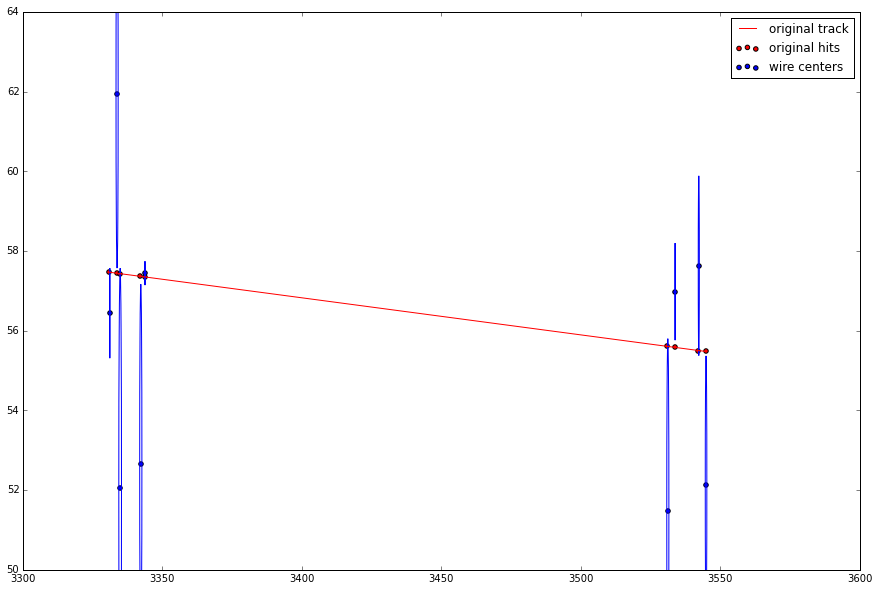

In [38]:
import matplotlib as mpl
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = int_hits.Wz.values
Wx = int_hits.Wx.values
Z = int_hits.Z.values
X = int_hits.X.values
R = (int_hits.dist2Wire.values) / np.sin(5. * np.pi / 180.)
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.scatter(Z, X, c='r', label='original hits')
plt.plot(Z, X, c='r', label='original track')

# The wire centers and dist2wire
plt.scatter(Wz, Wx, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    ellipse = mpl.patches.Ellipse(xy=(Wz[index], Wx[index]), width=2*R[index]*np.sin(5.*np.pi/180.),
                                  height=2*R[index], color='b', fill=False)
    ax.add_patch(ellipse)


plt.legend(loc='best')
plt.show()

### conventor_xz

In [39]:
hits2 = conventor_xz(track2, 1)
hits2

{3331.2793000000001: {61: <UV_views.parametresXZ instance at 0x11156d368>},
 3333.8793000000001: {62: <UV_views.parametresXZ instance at 0x11266bab8>},
 3334.9793: {63: <UV_views.parametresXZ instance at 0x11266bb90>},
 3342.3793000000001: {64: <UV_views.parametresXZ instance at 0x11014d3b0>},
 3343.8793000000001: {65: <UV_views.parametresXZ instance at 0x11014da70>},
 3531.2793000000001: {72: <UV_views.parametresXZ instance at 0x10e1ccdd0>},
 3533.8793000000001: {73: <UV_views.parametresXZ instance at 0x10e1ccb00>},
 3542.3793000000001: {74: <UV_views.parametresXZ instance at 0x10e1cc7a0>},
 3544.9793: {75: <UV_views.parametresXZ instance at 0x10e1cccb0>}}

### points_crossing_line_xz

In [40]:
intersecting_hits = {}
tmp = {}

k = plane_k
b = plane_b

hits_xz = get_xz(k, b, track2)

# TODO: the loop optimization
for z in hits2:

    y = k * z + b

    for hit_index in hits2[z]:

        x = hits_xz.loc[[hit_index]].Wx.values[0]

        if ((x > -250) & (x < 250) & (not hits2[z][hit_index].used)):

            hits2[z][hit_index].x = x
            tmp[hit_index] = x
            intersecting_hits.setdefault(z, []).append(hit_index)

In [41]:
[k, b] = np.polyfit(track2.Z.values, track2.X.values, 1)

_, crossing_points2, lin_regr2 = points_crossing_line_xz(k, b, 15, hits2, intersecting_hits, 6)

crossing_points2, lin_regr2

([62, 61, 64, 63, 72, 65, 73, 74, 75],
 array([ -7.88998838e-03,   8.24506907e+01]))

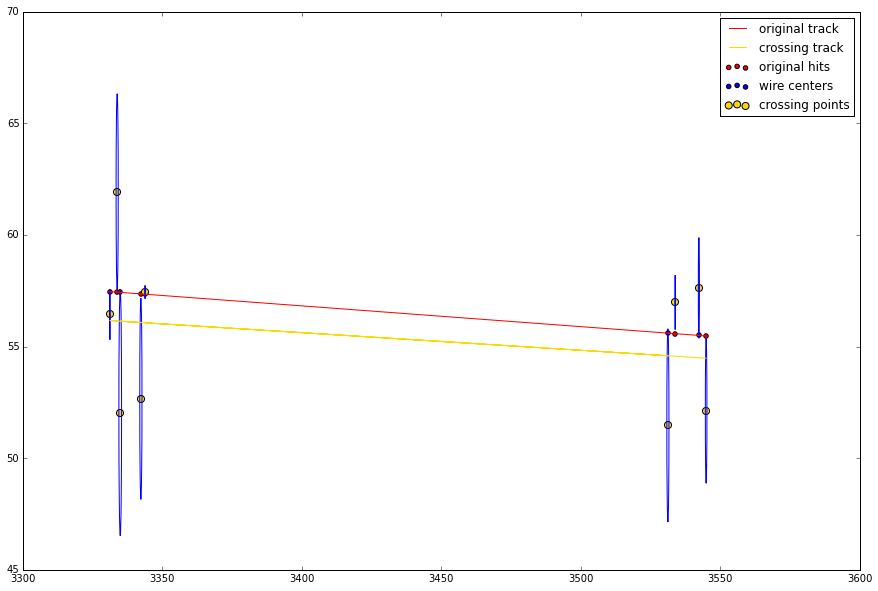

In [42]:
import matplotlib as mpl
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = int_hits.Wz.values
Wx = int_hits.Wx.values
Z = int_hits.Z.values
X = int_hits.X.values
R = (int_hits.dist2Wire.values) / np.sin(5. * np.pi / 180.)
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.scatter(Z, X, c='r', label='original hits')
plt.plot(Z, X, c='r', label='original track')

# The wire centers and dist2wire
plt.scatter(Wz, Wx, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    ellipse = mpl.patches.Ellipse(xy=(Wz[index], Wx[index]), width=2*R[index]*np.sin(5.*np.pi/180.),
                                  height=2*R[index], color='b', fill=False)
    ax.add_patch(ellipse)
    
# crossing point
Z_crossing = np.array([int_hits.loc[i].Wz for i in crossing_points2])
X_crossing = np.array([int_hits.loc[i].Wx for i in crossing_points2])
X_line_crossing = Z_crossing * lin_regr2[0] + lin_regr2[1]

plt.scatter(Z_crossing, X_crossing, c='gold', label='crossing points', s=50)
plt.plot(Z_crossing, X_line_crossing , c='gold', label='crossing track')


plt.legend(loc='best')
plt.show()

### loop_xz

In [43]:
new_tracks, new_linking_table, x_coordinates = loop_xz(event2, tracks, linking_table, 6, 15, 1)

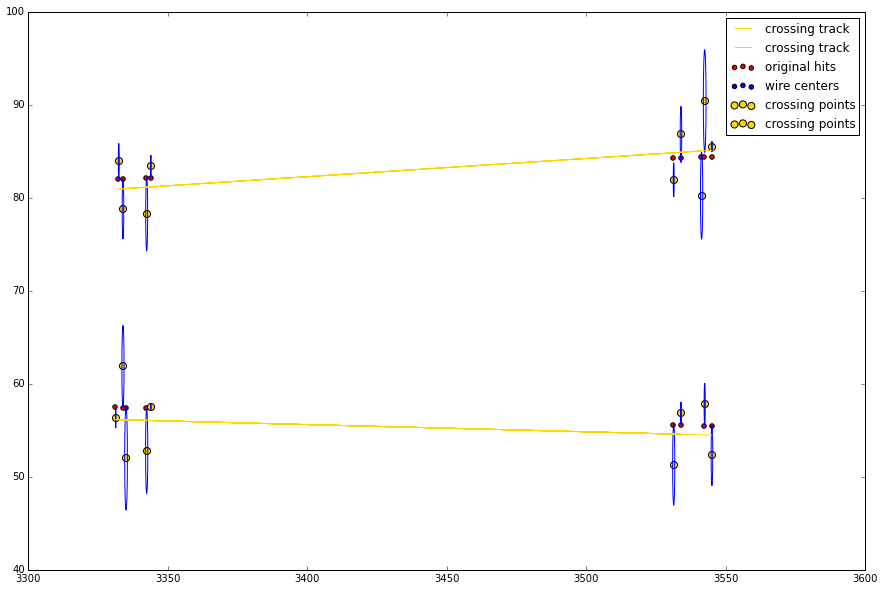

In [44]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = [event2.loc[[i]].Wz.values[0] for i in new_linking_table.values()[0]] + \
     [event2.loc[[i]].Wz.values[0] for i in new_linking_table.values()[1]]
Wx = [x_coordinates[i] for i in new_linking_table.values()[0]] + \
     [x_coordinates[i] for i in new_linking_table.values()[1]] 
Z = [event2.loc[[i]].Z.values[0] for i in new_linking_table.values()[0]] + \
    [event2.loc[[i]].Z.values[0] for i in new_linking_table.values()[1]]
X = [event2.loc[[i]].X.values[0] for i in new_linking_table.values()[0]] + \
    [event2.loc[[i]].X.values[0] for i in new_linking_table.values()[1]]

R = np.array([event2.loc[[i]].dist2Wire.values[0] for i in new_linking_table.values()[0]] + \
     [event2.loc[[i]].dist2Wire.values[0] for i in new_linking_table.values()[1]]) / np.sin(5. * np.pi / 180.)
StrwR = 0.5 * numpy.ones(shape=(len(Z),))

# originl track and hits
plt.scatter(Z, X, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wx, c='b', label='wire centers')
for index in range(0, len(Wz)):
    ellipse = mpl.patches.Ellipse(xy=(Wz[index], Wx[index]), width=2*R[index]*np.sin(5.*np.pi/180.),
                                  height=2*R[index], color='b', fill=False)
    ax.add_patch(ellipse)
    
# loop_yz
for key in new_linking_table:
    
    crossing_points = new_linking_table[key]
    lin_regr = new_tracks[key]
    Z_crossing = np.array([event2.loc[i].Wz for i in crossing_points])
    X_crossing = np.array([x_coordinates[i] for i in crossing_points])
    X_line_crossing = Z_crossing * lin_regr[0] + lin_regr[1]

    plt.scatter(Z_crossing, X_crossing, c='gold', label='crossing points', s=50)
    plt.plot(Z_crossing, X_line_crossing , c='gold', label='crossing track')



plt.legend(loc='best')
plt.show()

# Efficiency

In [45]:
from Y_views import loop_yz
from UV_views import loop_xz

reco_events12 = {}

for event_id in reconstructible_events.keys():
    
    event = all_hits[all_hits.event == event_id]
    
    tracks_yz, linking_table_yz = loop_yz(event, 7, 0.7, 0)
    tracks_xz, linking_table_xz, Xs = loop_xz(event, tracks_yz, linking_table_yz, 6, 15, 0)
    
    reco = [tracks_yz, linking_table_yz, tracks_xz, linking_table_xz]
    
    reco_events12[event_id] = reco

In [46]:
from Y_views import loop_yz
from UV_views import loop_xz

reco_events34 = {}

for event_id in reconstructible_events.keys():
    
    event = all_hits[all_hits.event == event_id]
    
    tracks_yz, linking_table_yz = loop_yz(event, 7, 0.7, 1)
    tracks_xz, linking_table_xz, Xs = loop_xz(event, tracks_yz, linking_table_yz, 6, 15, 1)
    
    reco = [tracks_yz, linking_table_yz, tracks_xz, linking_table_xz]
    
    reco_events34[event_id] = reco

### Efficiency 1&2 stations

In [47]:
from efficiency import efficiency

eff_y, eff_stereo, eff_station = efficiency(reconstructible_events.keys(), 
                                            all_hits, 
                                            reco_events12)

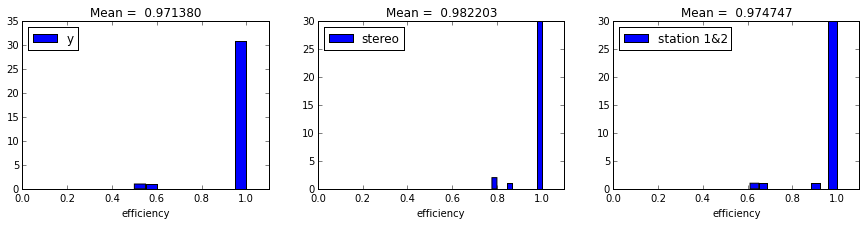

In [48]:
plt.figure(figsize=(15, 3))

plt.subplot(1,3,1)
plt.title('Mean = % f' % numpy.array(eff_y).mean())
plt.hist(eff_y, label='y')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,2)
plt.title('Mean = % f' % numpy.array(eff_stereo).mean())
plt.hist(eff_stereo, label='stereo')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,3)
plt.title('Mean = % f' % numpy.array(eff_station).mean())
plt.hist(eff_station, label='station 1&2')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.show()

### Efficiency for 3&4 stations

In [49]:
from efficiency import efficiency

eff_y, eff_stereo, eff_station = efficiency(reconstructible_events.keys(), 
                                            all_hits, 
                                            reco_events34)

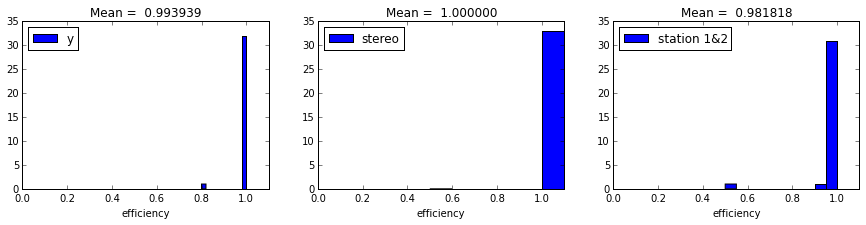

In [50]:
plt.figure(figsize=(15, 3))

plt.subplot(1,3,1)
plt.title('Mean = % f' % numpy.array(eff_y).mean())
plt.hist(eff_y, label='y')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,2)
plt.title('Mean = % f' % numpy.array(eff_stereo).mean())
plt.hist(eff_stereo, label='stereo')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,3)
plt.title('Mean = % f' % numpy.array(eff_station).mean())
plt.hist(eff_station, label='station 1&2')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.show()

# Matching and combination

### Dist y & dist x 

In [51]:
from MatchTracks import get_matched_tracks

match_tracks, dist_y, dist_x = get_matched_tracks(reco_events12, reco_events34)

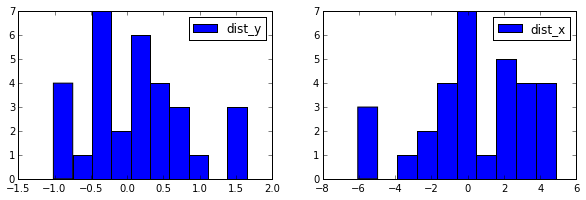

In [52]:
plt.figure(figsize=(10, 3))

plt.subplot(1,2,1)
plt.hist(dist_y, label='dist_y', bins=10)
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.hist(dist_x, label='dist_x', bins=10)
plt.legend(loc='best')

plt.show()